In [89]:
import yfinance as yf
import pandas as pd
import numpy as np

# Affichage plus lisible
pd.set_option("display.max_columns", None)


# Telechargement des données pour les tickers selectionnés

In [90]:
tickers = [
    "PSI",
    "IYW",
    "RING",
    "PICK",
    "NLR",
    "UTES",
    "LIT",
    "NANR",
    "GUNR",
    "XCEM",
    "PTLC",
    "FXU"
]

start_date = "2015-01-01"

data = yf.download(
    tickers=tickers,
    start=start_date,
    auto_adjust=True,   # ajuste prix pour dividendes & splits
    progress=False
)

In [91]:
close_prices = data["Close"].copy()
close_prices = close_prices.dropna()

In [92]:
close_prices

Ticker,FXU,GUNR,IYW,LIT,NANR,NLR,PICK,PSI,PTLC,RING,UTES,XCEM
Date,,,,,,,,,,,,
2015-12-18,16.569326,15.826991,24.743830,16.902912,19.121033,33.434582,10.725579,8.048888,20.466743,9.423354,21.083977,14.977440
2015-12-21,16.682295,15.882767,24.977722,16.920223,18.894262,33.416508,10.887069,8.157697,20.620085,9.601747,20.755663,14.329372
2015-12-22,16.817863,16.105883,25.134436,17.266415,19.259869,33.853420,11.169677,8.186502,20.746367,9.636727,20.859766,14.449597
2015-12-23,17.178965,16.682367,25.335579,17.560680,20.045074,34.184875,11.506112,8.231306,21.025991,9.846601,21.235321,14.449597
2015-12-24,17.163736,16.667795,25.315876,17.482788,20.099066,34.441002,11.721431,8.295316,21.025991,10.056476,21.212097,14.728185
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-29,45.189999,45.840000,201.949997,65.552002,68.050003,125.919998,51.070000,80.260002,56.089001,73.470001,79.480003,38.250000
2025-12-30,45.320000,46.139999,201.509995,65.519997,68.459999,123.870003,51.599998,80.239998,56.020000,74.830002,79.580002,38.380001
2025-12-31,45.009998,45.849998,199.679993,64.860001,67.830002,124.199997,51.340000,78.860001,55.580002,73.639999,78.949997,38.360001


In [93]:
returns = close_prices.pct_change().dropna()

momentum_1m = close_prices.pct_change(21)
momentum_3m = close_prices.pct_change(63)
momentum_6m = close_prices.pct_change(126)

vol_1m = returns.rolling(21).std()
vol_3m = returns.rolling(63).std()


In [94]:
def max_drawdown(series):
    cumulative = (1 + series).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

drawdown_6m = returns.rolling(126).apply(max_drawdown, raw=False)


In [95]:
corr_3m = (
    returns
    .rolling(63)
    .corr()
    .groupby(level=0)
    .mean()
)

corr_6m = (
    returns
    .rolling(126)
    .corr()
    .groupby(level=0)
    .mean()
)


In [96]:
features = pd.concat({
    "return_1d": returns,
    "momentum_1m": momentum_1m,
    "momentum_3m": momentum_3m,
    "momentum_6m": momentum_6m,
    "vol_1m": vol_1m,
    "vol_3m": vol_3m,
    "max_dd_6m": drawdown_6m,
    "corr_3m": corr_3m,
    "corr_6m": corr_6m
}, axis=1)
features = features.dropna()
features

return_1d                                                    \
Ticker           FXU      GUNR       IYW       LIT      NANR       NLR   
Date                                                                     
2016-06-21  0.008429  0.001536  0.006659  0.012759 -0.003567  0.000000   
2016-06-22 -0.004665 -0.001533 -0.004529 -0.010236  0.002088  0.009508   
2016-06-23  0.008067  0.023801  0.015450  0.019093  0.011611  0.002457   
2016-06-24 -0.010671 -0.053618 -0.042752 -0.066745 -0.024132 -0.022263   
2016-06-27  0.000771 -0.019018 -0.025061 -0.037223 -0.020507  0.000627   
...              ...       ...       ...       ...       ...       ...   
2025-12-29  0.003776 -0.009721 -0.004780 -0.031816 -0.012623 -0.006313   
2025-12-30  0.002877  0.006544 -0.002179 -0.000488  0.006025 -0.016280   
2025-12-31 -0.006840 -0.006285 -0.009081 -0.010073 -0.009202  0.002664   
2026-01-02  0.011109  0.015922  0.001052  0.021739  0.017249  0.071175   
2026-01-05 -0.011426  0.009661  0.002551  0.017202  0.021449  0.043370   

                                                                        \
Ticker          PICK       PSI      PTLC      RING      UTES      XCEM   
Date                                                                     
2016-06-21  0.000988  0.001114  0.003612 -0.029224  0.003845  0.003145   
2016-06-22 -0.005947 -0.005564 -0.003599  0.027017 -0.005267 -0.003597   
2016-06-23  0.040878  0.019769  0.013544 -0.010999 -0.000802  0.024526   
2016-06-24 -0.086207 -0.052304 -0.034744  0.058388  0.006102 -0.053975   
2016-06-27 -0.029350 -0.046700 -0.018920  0.015762  0.007979  0.000000   
...              ...       ...       ...       ...       ...       ...   
2025-12-29 -0.024451 -0.007666 -0.002990 -0.065505  0.000000  0.004201   
2025-12-30  0.010378 -0.000249 -0.001230  0.018511  0.001258  0.003399   
2025-12-31 -0.005039 -0.017198 -0.007854 -0.015903 -0.007917 -0.000521   
2026-01-02  0.019868  0.050850  0.002339 -0.001086  0.020646  0.022941   
2026-01-05  0.026165  0.018463  0.006642  0.033850 -0.013031  0.012232   

           momentum_1m                                                    \
Ticker             FXU      GUNR       IYW       LIT      NANR       NLR   
Date                                                                       
2016-06-21    0.050279  0.042027  0.022442  0.085006  0.041326  0.026087   
2016-06-22    0.054638  0.037957  0.018595  0.068878  0.038059  0.035843   
2016-06-23    0.052134  0.059723  0.012690  0.091606  0.064148  0.035095   
2016-06-24    0.042153 -0.014610 -0.038938  0.000837  0.014192  0.013122   
2016-06-27    0.032658 -0.032600 -0.065641 -0.039633 -0.002669  0.002932   
...                ...       ...       ...       ...       ...       ...   
2025-12-29   -0.037458  0.036499  0.024062  0.046489  0.039511  0.005598   
2025-12-30   -0.039561  0.035148  0.014528  0.035265  0.031859 -0.023254   
2025-12-31   -0.025639  0.025217  0.004051  0.031992  0.019763  0.000437   
2026-01-02   -0.002602  0.048992 -0.004947  0.057952  0.050039  0.048086   
2026-01-05   -0.010987  0.046953 -0.002706  0.071545  0.058469  0.068894   

                                                                        \
Ticker          PICK       PSI      PTLC      RING      UTES      XCEM   
Date                                                                     
2016-06-21  0.062959  0.068599  0.018790  0.031038  0.071132  0.075260   
2016-06-22  0.058860  0.052255  0.018391  0.067174  0.059495  0.074056   
2016-06-23  0.102144  0.046435  0.017218  0.123528  0.058645  0.093333   
2016-06-24 -0.017659 -0.011692 -0.023434  0.163699  0.062943  0.034321   
2016-06-27 -0.053288 -0.063191 -0.042342  0.180839  0.062795  0.034321   
...              ...       ...       ...       ...       ...       ...   
2025-12-29  0.104753  0.063818  0.014498  0.062012 -0.043876  0.044484   
2025-12-30  0.105857  0.042008  0.008018  0.063322 -0.049612  0.044449   
2025-12-31  0.091991  0.031589  0.004393  0.047005 -0.0325

In [97]:
features.columns = [f"{feat}_{ticker}" for feat, ticker in features.columns]

In [98]:
# Reset index to have 'Date' as a column
features = features.reset_index()

# Melt all columns to long format
dataset = features.melt(id_vars="Date", var_name="Ticker_Feature", value_name="value")

# Split 'Ticker_Feature' into separate 'Ticker' and 'Feature' columns
dataset[["Feature", "Ticker"]] = dataset["Ticker_Feature"].str.rsplit("_", n=1, expand=True)

# Pivot so each feature is a column
dataset = dataset.pivot_table(
    index=["Date", "Ticker"],
    columns="Feature",
    values="value"
).reset_index()

In [99]:
dataset = dataset.dropna().reset_index(drop=True)

In [100]:
dataset.head(20)

Feature,Date,Ticker,corr_3m,corr_6m,max_dd_6m,momentum_1m,momentum_3m,momentum_6m,return_1d,vol_1m,vol_3m
0,2016-06-21,FXU,0.371796,0.482132,-0.059031,0.050279,0.039248,0.216054,0.008429,0.005587,0.007507
1,2016-06-21,GUNR,0.535928,0.583935,-0.158148,0.042027,0.061409,0.214563,0.001536,0.011395,0.013709
2,2016-06-21,IYW,0.387731,0.462349,-0.144698,0.022442,-0.009024,0.011725,0.006659,0.007017,0.008022
3,2016-06-21,LIT,0.505036,0.539793,-0.156479,0.085006,0.165138,0.303661,0.012759,0.011497,0.012132
4,2016-06-21,NANR,0.459487,0.506045,-0.177220,0.041326,0.125673,0.362250,-0.003567,0.011997,0.016568
5,2016-06-21,NLR,0.373735,0.432843,-0.062774,0.026087,0.011499,0.090033,0.000000,0.005790,0.008028
6,2016-06-21,PICK,0.520313,0.545708,-0.211251,0.062959,0.038975,0.271017,0.000988,0.019890,0.023194
7,2016-06-21,PSI,0.324797,0.458628,-0.177376,0.068599,0.065230,0.074972,0.001114,0.008240,0.011297
8,2016-06-21,PTLC,0.496474,0.392549,-0.081127,0.018790,0.026790,-0.017778,0.003612,0.005278,0.005879
9,2016-06-21,RING,0.275621,0.187817,-0.146865,0.031038,0.205216,0.972903,-0.029224,0.034132,0.034701


In [101]:
metadata = pd.read_excel(
    "/Users/hakimbenkirane/Downloads/etf_portfolio_db.xlsx",
    sheet_name="Qualified_ETFs"
)

In [102]:
dataset_merged = dataset.merge(
    metadata[["Ticker", "Region (General)_x"]],
    left_on="Ticker",   # column in your dataset
    right_on="Ticker",
    how="left"
)

In [103]:
dataset_merged.head(10)

,Date,Ticker,corr_3m,corr_6m,max_dd_6m,momentum_1m,momentum_3m,momentum_6m,return_1d,vol_1m,vol_3m,Region (General)_x
0,2016-06-21,FXU,0.371796,0.482132,-0.059031,0.050279,0.039248,0.216054,0.008429,0.005587,0.007507,North America
1,2016-06-21,GUNR,0.535928,0.583935,-0.158148,0.042027,0.061409,0.214563,0.001536,0.011395,0.013709,Developed Markets
2,2016-06-21,IYW,0.387731,0.462349,-0.144698,0.022442,-0.009024,0.011725,0.006659,0.007017,0.008022,North America
3,2016-06-21,LIT,0.505036,0.539793,-0.156479,0.085006,0.165138,0.303661,0.012759,0.011497,0.012132,Developed Markets
4,2016-06-21,NANR,0.459487,0.506045,-0.177220,0.041326,0.125673,0.362250,-0.003567,0.011997,0.016568,North America
5,2016-06-21,NLR,0.373735,0.432843,-0.062774,0.026087,0.011499,0.090033,0.000000,0.005790,0.008028,Developed Markets
6,2016-06-21,PICK,0.520313,0.545708,-0.211251,0.062959,0.038975,0.271017,0.000988,0.019890,0.023194,Developed Markets
7,2016-06-21,PSI,0.324797,0.458628,-0.177376,0.068599,0.065230,0.074972,0.001114,0.008240,0.011297,North America
8,2016-06-21,PTLC,0.496474,0.392549,-0.081127,0.018790,0.026790,-0.017778,0.003612,0.005278,0.005879,North America
9,2016-06-21,RING,0.275621,0.187817,-0.146865,0.031038,0.205216,0.972903,-0.029224,0.034132,0.034701,Developed Markets


Sanity check

In [104]:
#Renaming dataframe df for ease and checking shape
df = dataset_merged
df.shape

(28788, 12)

In [105]:
#Checking for duplicates
duplicates = df.duplicated(subset=["Date", "Ticker"])
duplicates.sum()

0

In [106]:
#dtype check and Date formatting
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
print(df.dtypes)

Date                  datetime64[ns]
Ticker                        object
corr_3m                      float64
corr_6m                      float64
max_dd_6m                    float64
momentum_1m                  float64
momentum_3m                  float64
momentum_6m                  float64
return_1d                    float64
vol_1m                       float64
vol_3m                       float64
Region (General)_x            object
dtype: object


In [107]:
#Missing data check
missing_summary = (
    df.isna()
      .mean()
      .sort_values(ascending=False)
)

print("Missing value ratio per column:")
print(missing_summary)

Missing value ratio per column:
Date                  0.0
Ticker                0.0
corr_3m               0.0
corr_6m               0.0
max_dd_6m             0.0
momentum_1m           0.0
momentum_3m           0.0
momentum_6m           0.0
return_1d             0.0
vol_1m                0.0
vol_3m                0.0
Region (General)_x    0.0
dtype: float64


In [108]:
#Checking for duplicate dates per ETF
dup_dates = (
    df.groupby("Ticker")["Date"]
      .apply(lambda x: x.duplicated().sum())
)
dup_dates

Ticker
FXU     0
GUNR    0
IYW     0
LIT     0
NANR    0
NLR     0
PICK    0
PSI     0
PTLC    0
RING    0
UTES    0
XCEM    0
Name: Date, dtype: int64

In [109]:
#Checking for gaps
def count_date_gaps(x):
    dates = x.sort_values()
    diffs = dates.diff().dt.days
    return (diffs > 5).sum()  # >5 days ≈ non-holiday gap

gaps = (
    df.groupby("Ticker")["Date"]
      .apply(count_date_gaps)
      .sort_values(ascending=False)
)

gaps

Ticker
FXU     0
GUNR    0
IYW     0
LIT     0
NANR    0
NLR     0
PICK    0
PSI     0
PTLC    0
RING    0
UTES    0
XCEM    0
Name: Date, dtype: int64

In [110]:
#Checking date coverage per ETF
date_coverage = (
    df.groupby("Ticker")["Date"]
      .nunique()
      .sort_values()
)

date_coverage

Ticker
FXU     2399
GUNR    2399
IYW     2399
LIT     2399
NANR    2399
NLR     2399
PICK    2399
PSI     2399
PTLC    2399
RING    2399
UTES    2399
XCEM    2399
Name: Date, dtype: int64

In [111]:
df

,Date,Ticker,corr_3m,corr_6m,max_dd_6m,momentum_1m,momentum_3m,momentum_6m,return_1d,vol_1m,vol_3m,Region (General)_x
0,2016-06-21,FXU,0.371796,0.482132,-0.059031,0.050279,0.039248,0.216054,0.008429,0.005587,0.007507,North America
1,2016-06-21,GUNR,0.535928,0.583935,-0.158148,0.042027,0.061409,0.214563,0.001536,0.011395,0.013709,Developed Markets
2,2016-06-21,IYW,0.387731,0.462349,-0.144698,0.022442,-0.009024,0.011725,0.006659,0.007017,0.008022,North America
3,2016-06-21,LIT,0.505036,0.539793,-0.156479,0.085006,0.165138,0.303661,0.012759,0.011497,0.012132,Developed Markets
4,2016-06-21,NANR,0.459487,0.506045,-0.177220,0.041326,0.125673,0.362250,-0.003567,0.011997,0.016568,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
28783,2026-01-05,PSI,0.671015,0.561346,-0.130407,0.052960,0.169372,0.395143,0.018463,0.021949,0.025399,North America
28784,2026-01-05,PTLC,0.646848,0.581596,-0.050801,0.008559,0.029818,0.111630,0.006642,0.005642,0.008025,North America
28785,2026-01-05,RING,0.537508,0.468211,-0.192212,0.106787,0.164977,0.697663,0.033850,0.023848,0.030305,Developed Markets
28786,2026-01-05,UTES,0.540740,0.435813,-0.110946,-0.011691,-0.060259,0.064963,-0.013031,0.012947,0.012886,North America


In [ ]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

df1 = df.copy()

#Don't include the target 'return_1d'
numeric_features = [
    'corr_3m', 'corr_6m', 'max_dd_6m',
    'momentum_1m', 'momentum_3m', 'momentum_6m',
    'vol_1m', 'vol_3m'
]

scaler = RobustScaler()
df1[numeric_features] = scaler.fit_transform(df1[numeric_features])

# Encode categorical feature 'Region (General)_x'
le = LabelEncoder()
df1['Region_Encoded'] = le.fit_transform(df1['Region (General)_x'])


print(f"\nEncoding mapping:")
for i, region in enumerate(le.classes_):
    print(f"  {region} -> {i}")

df1.head(10)


Encoding mapping:
  Developed Markets -> 0
  Emerging Markets -> 1
  North America -> 2


,Date,Ticker,corr_3m,corr_6m,max_dd_6m,momentum_1m,momentum_3m,momentum_6m,return_1d,vol_1m,vol_3m,Region (General)_x,Region_Encoded
0,2016-06-21,FXU,-0.738184,-0.266376,0.567384,0.511335,0.034885,0.855807,0.008429,-0.724479,-0.572359,North America,2
1,2016-06-21,GUNR,0.115386,0.363471,-0.448417,0.395943,0.221531,0.847439,0.001536,-0.049221,0.175486,Developed Markets,0
2,2016-06-21,IYW,-0.655315,-0.388776,-0.310582,0.122092,-0.371666,-0.291010,0.006659,-0.558195,-0.510288,North America,2
3,2016-06-21,LIT,-0.045269,0.090366,-0.431319,0.996920,1.095141,1.347510,0.012759,-0.037397,-0.014704,Developed Markets,0
4,2016-06-21,NANR,-0.282148,-0.118427,-0.643881,0.386138,0.762764,1.676350,-0.003567,0.020735,0.520222,North America,2
5,2016-06-21,NLR,-0.728100,-0.571327,0.529025,0.173056,-0.198821,0.148500,0.000000,-0.700816,-0.509480,Developed Markets,0
6,2016-06-21,PICK,0.034184,0.126964,-0.992654,0.688641,0.032583,1.164291,0.000988,0.938352,1.319087,Developed Markets,0
7,2016-06-21,PSI,-0.982604,-0.411798,-0.645477,0.767495,0.253710,0.063972,0.001114,-0.415972,-0.115335,North America,2
8,2016-06-21,PTLC,-0.089796,-0.820629,0.340926,0.071023,-0.070040,-0.456595,0.003612,-0.760326,-0.768612,North America,2
9,2016-06-21,RING,-1.238345,-2.087299,-0.332784,0.242284,1.432680,5.103697,-0.029224,2.594144,2.706543,Developed Markets,0


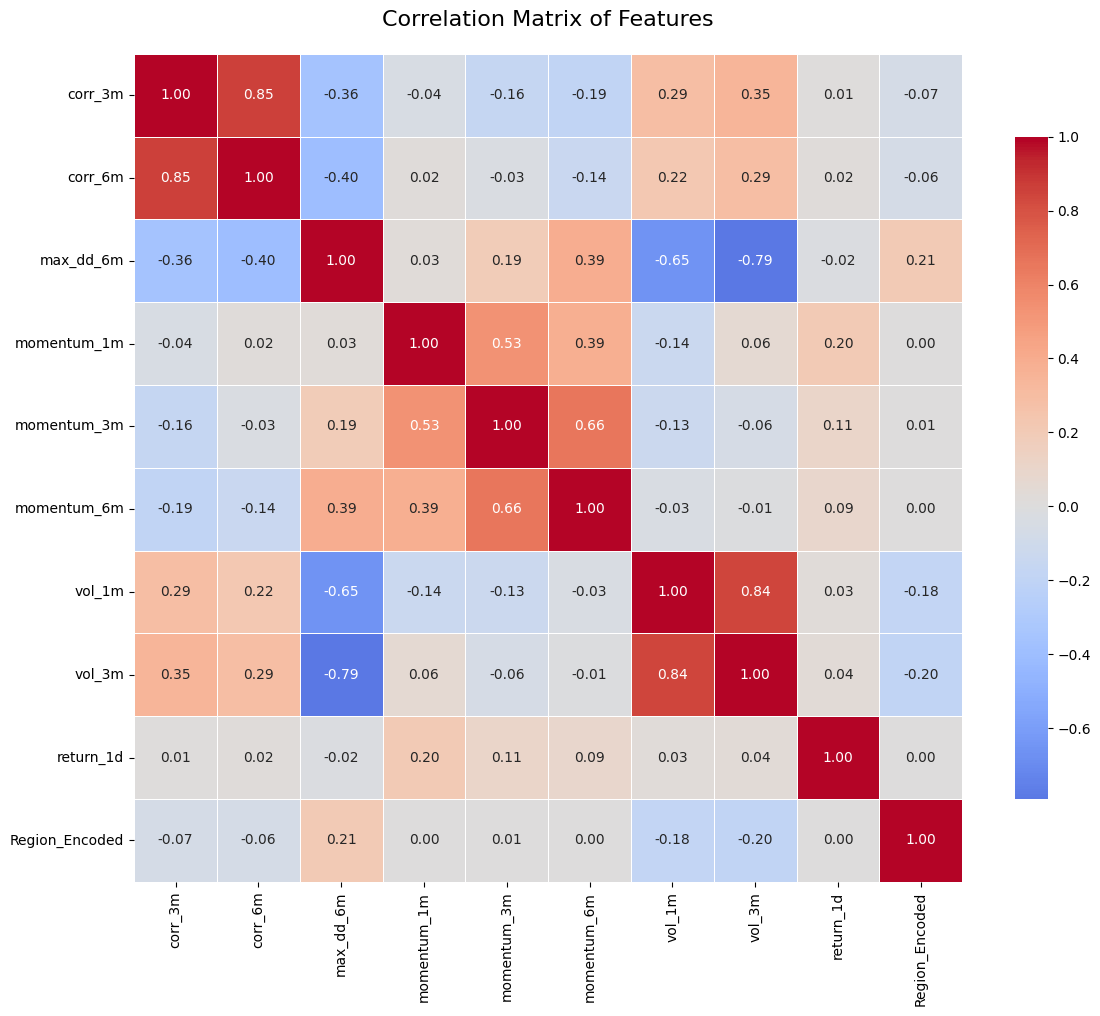

HIGH CORRELATIONS (|r| > 0.7)
Feature 1 Feature 2  Correlation
  corr_3m   corr_6m     0.853831
   vol_1m    vol_3m     0.839122
max_dd_6m    vol_3m    -0.791605


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = numeric_features + ['return_1d', 'Region_Encoded']
correlation_matrix = df1[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation Matrix of Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_val
            })

if high_corr:
    print("HIGH CORRELATIONS (|r| > 0.7)")
    high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', key=abs, ascending=False)
    print(high_corr_df.to_string(index=False))
else:
    print("No high correlations found (threshold: |r| > 0.7)")


In [115]:
df1.drop(columns=["vol_3m","corr_6m"], inplace=True)

In [116]:
df1

,Date,Ticker,corr_3m,max_dd_6m,momentum_1m,momentum_3m,momentum_6m,return_1d,vol_1m,Region (General)_x,Region_Encoded
0,2016-06-21,FXU,-0.738184,0.567384,0.511335,0.034885,0.855807,0.008429,-0.724479,North America,2
1,2016-06-21,GUNR,0.115386,-0.448417,0.395943,0.221531,0.847439,0.001536,-0.049221,Developed Markets,0
2,2016-06-21,IYW,-0.655315,-0.310582,0.122092,-0.371666,-0.291010,0.006659,-0.558195,North America,2
3,2016-06-21,LIT,-0.045269,-0.431319,0.996920,1.095141,1.347510,0.012759,-0.037397,Developed Markets,0
4,2016-06-21,NANR,-0.282148,-0.643881,0.386138,0.762764,1.676350,-0.003567,0.020735,North America,2
...,...,...,...,...,...,...,...,...,...,...,...
28783,2026-01-05,PSI,0.817907,-0.164121,0.548822,1.130806,1.860965,0.018463,1.177801,North America,2
28784,2026-01-05,PTLC,0.692228,0.651727,-0.072043,-0.044532,0.269719,0.006642,-0.718009,North America,2
28785,2026-01-05,RING,0.123602,-0.797526,1.301476,1.093784,3.558888,0.033850,1.398505,Developed Markets,0
28786,2026-01-05,UTES,0.140413,0.035328,-0.355197,-0.803171,0.007797,-0.013031,0.131247,North America,2


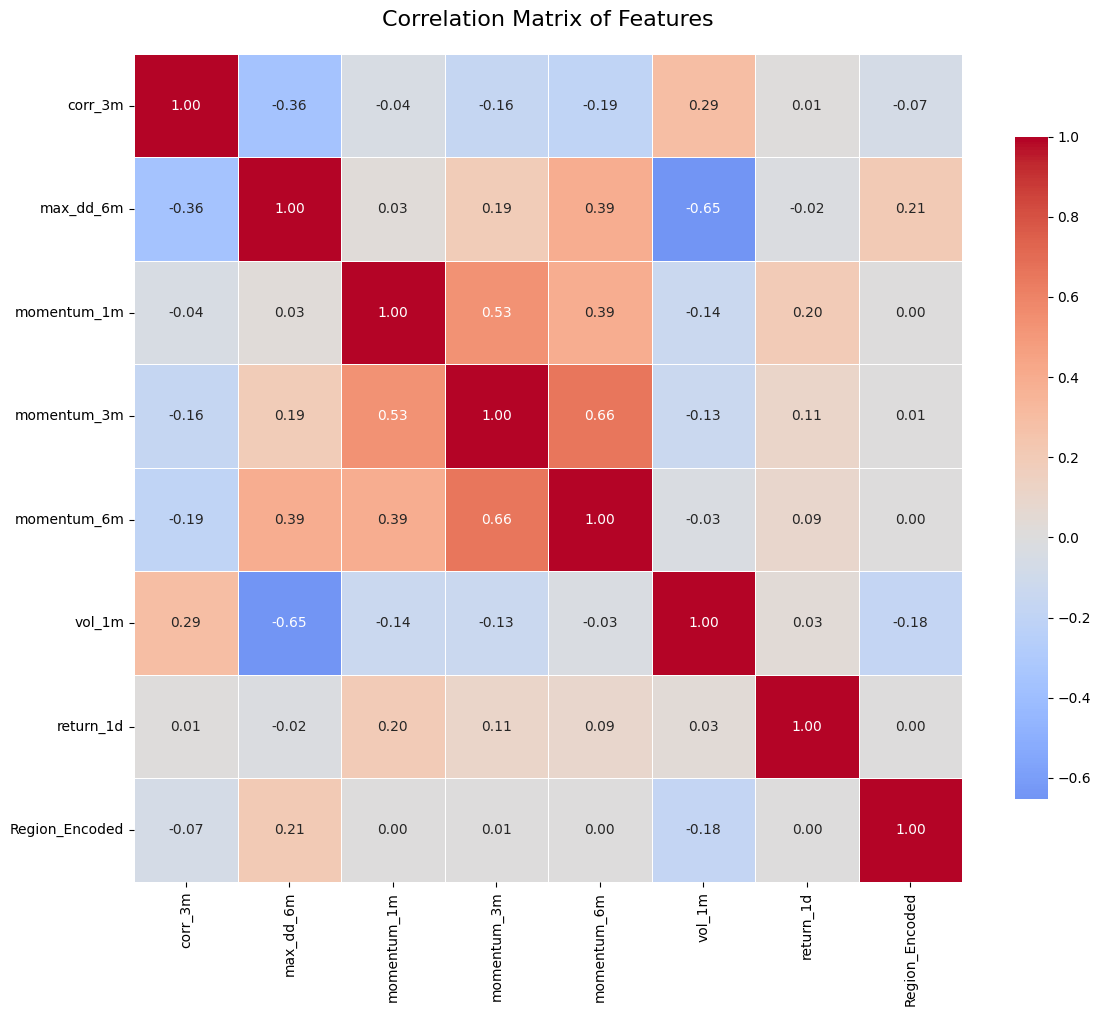

No high correlations found (threshold: |r| > 0.7)


In [ ]:

numeric_features = [
    'corr_3m', 'max_dd_6m',
    'momentum_1m', 'momentum_3m', 'momentum_6m',
    'vol_1m'
]

numeric_cols = numeric_features + ['return_1d', 'Region_Encoded']
correlation_matrix = df1[numeric_cols].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation Matrix of Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_val
            })

if high_corr:
    print("HIGH CORRELATIONS (|r| > 0.7)")
    high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', key=abs, ascending=False)
    print(high_corr_df.to_string(index=False))
else:
    print("No high correlations found (threshold: |r| > 0.7)")